1) Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

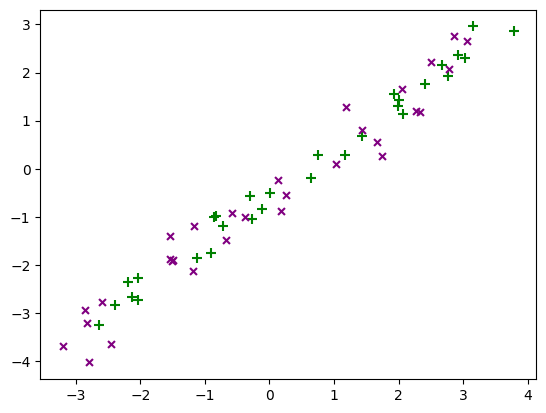

In [4]:
x = np.linspace(-3, 3, 10) + np.random.rand(1,3,10)
y = x - np.random.rand(1,3,10)

fig, axes = plt.subplots()
axes.scatter(x, y, color = "green", s = 50, marker='+' )
axes.scatter(x-np.random.rand(1,3,10), y-np.random.rand(1,3,10),  color="purple", s = 25, marker='x' )
#plt.show() 

2. Vykreslete 3D graf s funkcí....


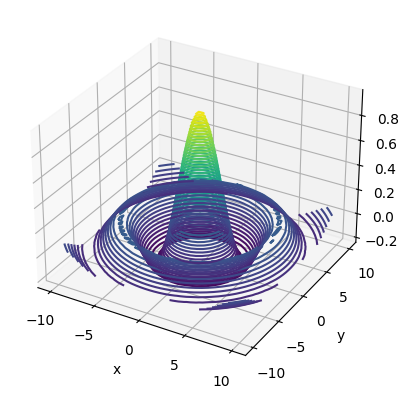

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2)) / np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-10, 10, 40)
y = np.linspace(-10, 10, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.contour(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

3. Vykreslete polar graf s funkcí r = 2sin(3o) Použijte funkci plot a nastavte barvu, osy a titulek.

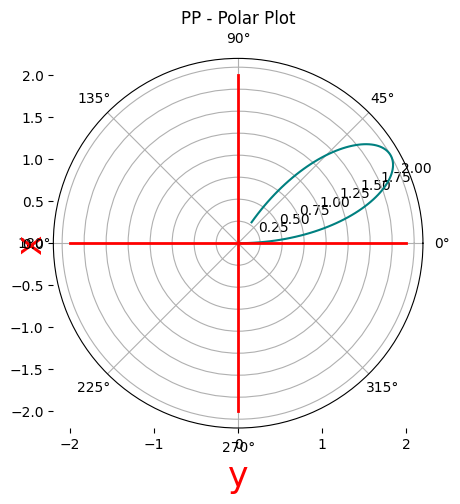

In [6]:
def r(ot):
    return 2 * np.sin(3*ot)
ot = np.linspace(0,1,100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(ot, r(ot), color = 'teal')
ax.set_title("PP - Polar Plot", fontsize = 12)
ax.set_xlabel('y', fontsize = 25, color = 'red')
ax.set_ylabel('x', fontsize = 25, color = 'red')

ax2 = fig.add_axes(ax.get_position(), frameon=False) #snad jsem to s temi osami pochopil spravne
ax2.plot([-2, 2], [0, 0], color='red', linewidth=2)
ax2.plot([0, 0], [-2, 2], color='red', linewidth=2)

#ax.plot([0, 0], [0, 2], color='yellow', linewidth=3) # alternativni metoda
plt.show() 

4.Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.

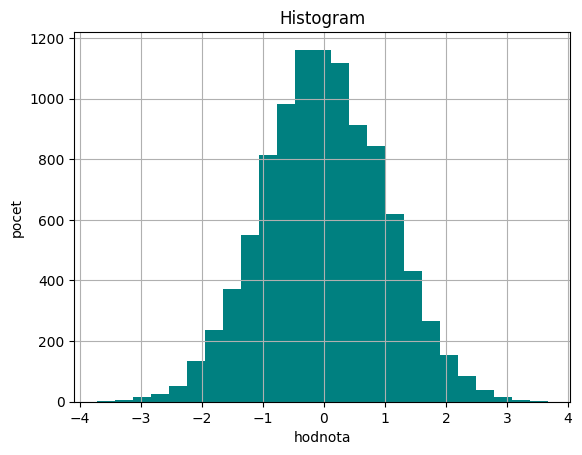

In [7]:
fig = plt.figure()
n = np.random.randn(10000)
ax = plt.hist(n, bins=25, color = 'teal')
plt.title('Histogram')
plt.xlabel('hodnota')
plt.ylabel('pocet')
plt.grid(True)
plt.show()

5.Vytvořte 3D surf graf s funkcí

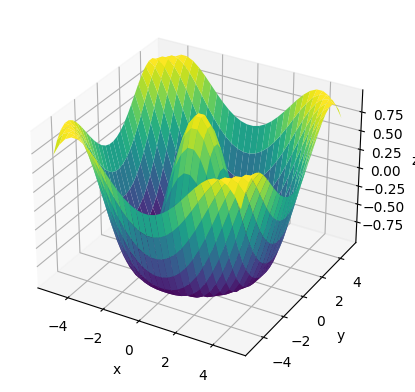

In [8]:
def f(x, y):
    return np.cos(np.sqrt(x ** 2 + y ** 2))


x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Bonus, chtěl jsem si to zkusit jak to bude vypadat postupně

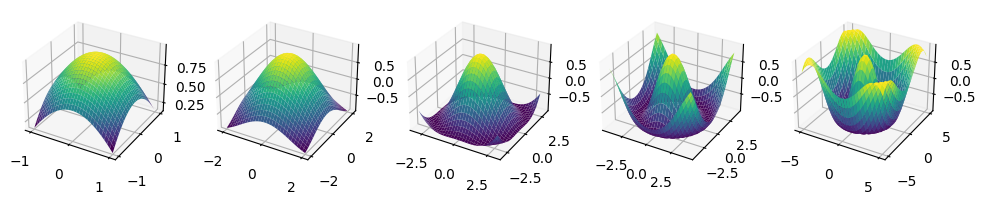

In [29]:
def f(x, y):
    return np.cos(np.sqrt(x ** 2 + y ** 2))

fig = plt.figure( figsize=(12, 6))
axs = fig.subplots(1, 5, subplot_kw={'projection': '3d'})

for i, ax in enumerate(axs, 1):
    x = np.linspace(-i, i, 30)
    y = np.linspace(-i, i, 30)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    ax.plot_surface(X, Y, Z, cmap = 'viridis')

plt.show()

DU

- Použijte funkce z minulého úkolu integer_spiral_numpy a integer_spiral a vykreslete spirálu a její sinus pomocí imshow a contour.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu?

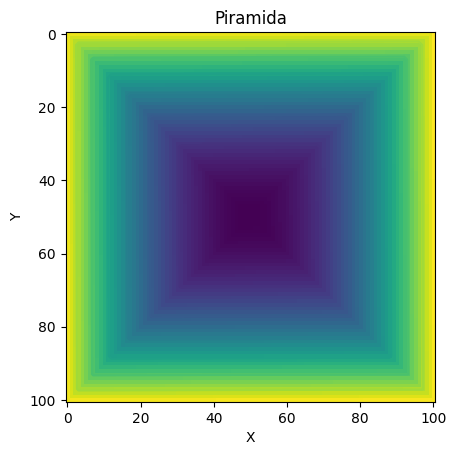

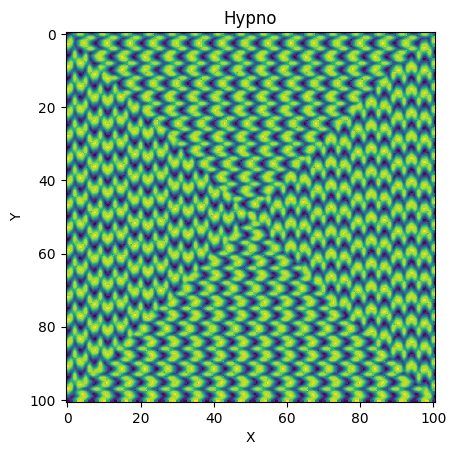

In [95]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

def integer_spiral(n):
    A = np.zeros([n+2,n+2])
    pos_rows = n//2 +1
    pos_cols = n//2 +1
    i = 1

    A[pos_rows, pos_cols] = i
    i += 1
    pos_rows -= 1

    while(i <= n**2):
        A[pos_rows, pos_cols] = i
        i+=1
        if(A[pos_rows - 1, pos_cols] != 0 and A[pos_rows, pos_cols + 1] == 0):
            pos_cols += 1
        elif(A[pos_rows, pos_cols - 1] != 0):
            pos_rows -= 1
        elif(A[pos_rows + 1, pos_cols] != 0):
            pos_cols -= 1
        else:
            pos_rows += 1

    return A[1:-1, 1:-1]

def integer_spiral_numpy(n):

    B = np.zeros([n+2,n+2], dtype = int)
    b = np.arange(1,(n**2)+1)
    i,j = n//2 +1, n//2 +1
    current = 1

    for k in range(int((n+1)/2)-1): #int((n+1)/2)
        
        hrana_Up = slice(current, current+2*k+1)
        B[i+k-1:i-k-2:-1, j+k] = b[hrana_Up]
        current += 2*k+1
        
        hrana_Left = slice(current, current+2*k+1)
        B[i-k-1, j+k-1:j-k-2:-1] = b[hrana_Left]
        current += 2*k+1
        
        hrana_Down = slice(current, current+2*k+2)
        B[i-k:i+k+2, j-k-1] = b[hrana_Down]
        current += 2*k+2
        
        hrana_Right = slice(current, current+2*k+2)
        B[i+k+1, j-k:j+k+2 ] = b[hrana_Right]
        current += 2*k+2

    k =int((n+1)/2)-1
    hrana_Up = slice(current, current+2*k+1)
    B[i+k-1:i-k-1:-1, j+k] = b[hrana_Up]
    B[i, j] = 1    
    return B[1:-1, 1:-1]

"""""
A = integer_spiral(7)
print("-----------------------------")
B = integer_spiral_numpy(7)
print("-----------------------------""\n""SPIRAL")

fig = plt.figure()
ax = fig.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

#x = np.linspace(-10, 10, 40)
#y = np.linspace(-10, 10, 40)
#X, Y = np.meshgrid(x, y)
#Z = f(X, Y)

def axe(x):
    return np.sin(np.sqrt(x ** 2))
"""""

n = 101
X = integer_spiral_numpy(n)
plt.figure()
plt.contour(X)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Piramida')
plt.imshow(X)
x = np.sin(X)
plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hypno')
plt.contour(x)
plt.imshow(x)
plt.show()

In [63]:
"""""
print("-----------------------------""\n""SPIRAL")
%time integer_spiral(1001)
print("-----------------------------" "\n" "NUMPY_SPIRAL" )
%time integer_spiral_numpy(1001)
print("-----------------------------")
"""""


print("-----------------------------""\n""SPIRAL - i=55")
%time integer_spiral(55)
print("\n" "NUMPY_SPIRAL" )
%time integer_spiral_numpy(55)
print("-----------------------------")

print("-----------------------------""\n""SPIRAL - i=101")
%time integer_spiral(101)
print("\n" "NUMPY_SPIRAL" )
%time integer_spiral_numpy(101)
print("-----------------------------")

print("-----------------------------""\n""SPIRAL i=1001")
%time integer_spiral(1001)
print("\n" "NUMPY_SPIRAL" )
%time integer_spiral_numpy(1001)
print("-----------------------------")
print("Ve vsech pripadech je rychlejsi integer_spiral_numpy")


-----------------------------
SPIRAL - i=55
CPU times: total: 0 ns
Wall time: 1.99 ms

NUMPY_SPIRAL
CPU times: total: 0 ns
Wall time: 0 ns
-----------------------------
-----------------------------
SPIRAL - i=101
CPU times: total: 15.6 ms
Wall time: 5.98 ms

NUMPY_SPIRAL
CPU times: total: 0 ns
Wall time: 994 µs
-----------------------------
-----------------------------
SPIRAL i=1001
CPU times: total: 656 ms
Wall time: 657 ms

NUMPY_SPIRAL
CPU times: total: 0 ns
Wall time: 5.63 ms
-----------------------------
Ve vsech pripadech je rychlejsi integer_spiral_numpy


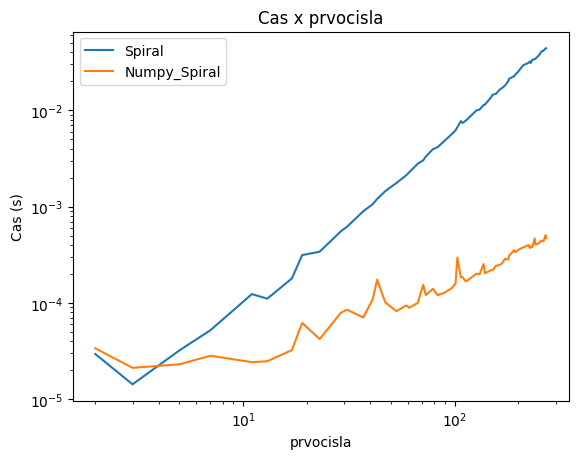

In [98]:
import timeit
def prvocisla(n):
    N,j = 2,0
    list_prv = list(range(n+1))
    
    while 1:
        prvocislo_otaznik = True
        for i in range(2, N):
            if(N % i == 0):
                prvocislo_otaznik = False
                break
        
        if prvocislo_otaznik:
            list_prv[j] = N
            j += 1
            
        N += 1
        if(list_prv[n] != n): return list_prv

x = prvocisla(57)

times = []
timess = []
for i in x:
    t = timeit.timeit(lambda: integer_spiral(i), number=1)
    t2 = timeit.timeit(lambda: integer_spiral_numpy(i), number=1)
    times.append(t)
    timess.append(t2)



plt.loglog(x, times)
plt.loglog(x, timess)
plt.xlabel('prvocisla')
plt.ylabel('Cas (s)')
plt.title('Cas x prvocisla')
plt.legend(["Spiral", "Numpy_Spiral"])
plt.show()


- Použijte funkce z minulého úkolu integer_spiral_numpy a integer_spiral a vykreslete spirálu a její sinus pomocí imshow a contour.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu?